### About the dataset

Age: Customer's age in completed years  
Experience: Number of years of professional experience  
Income: Annual income of the customer (\$000s)  
Family Size: Family size of the customer  
CCAvg: Average spending on credit cards per month ($000s)  
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  
Mortgage: Value of house mortgage if any (\$000s)  
Securities Account: (1 f customer has securities account with bank, 0 otherwise)  
CD Account: (1 if customer has certificate of deposit (CD) account with bank, 0 otherwise)  
Online Banking: (1 if customer uses Internet banking facilities, 0 otherwise)  
Credit Card: (1 if customer uses credit card, 0 otherwise)  

# Data Preprocessing

In [64]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [65]:
# Load the Universal Bank Data
df = pd.read_csv('drive/MyDrive/Datasets/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [66]:
# Checking for null values
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [67]:
# Dropping ID and ZIP Code columns from the dataset
df1 = df.drop(["ID","ZIP Code"], axis = 1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Univariate Analysis

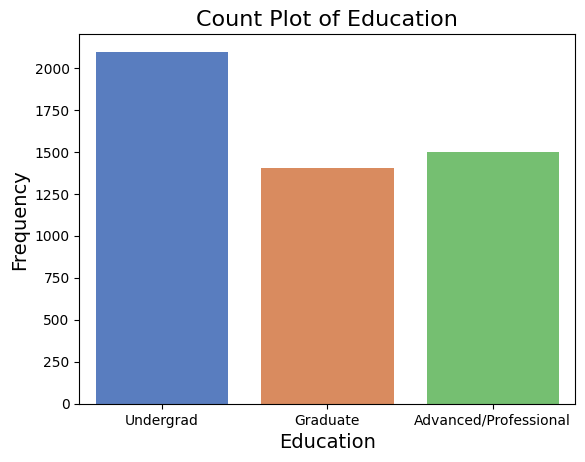

In [68]:
# Set the color palette
colors = sns.color_palette('muted')

# Create the count plot
sns.countplot(x='Education', data=df, palette=colors)

# Set the title and axis labels
plt.title('Count Plot of Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.xticks(ticks=[0,1,2], labels=['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

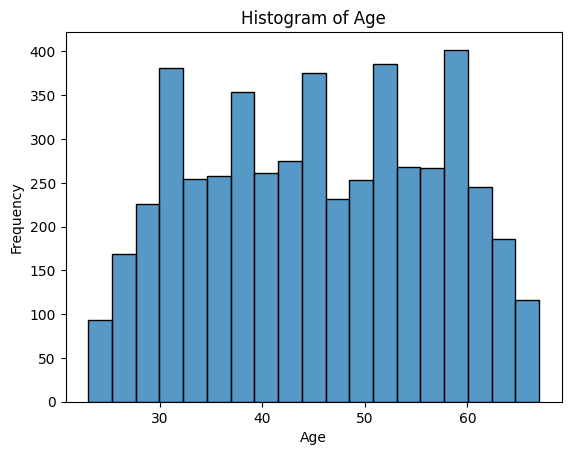

In [69]:
sns.histplot(x='Age', data=df)

# Set plot title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Text(0, 0.5, 'Frequency')

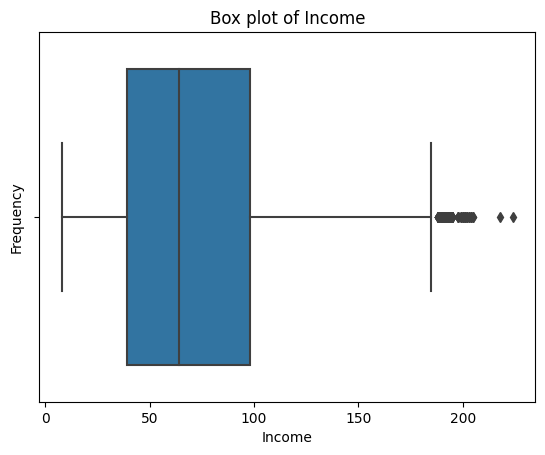

In [70]:
sns.boxplot(data=df, x='Income')
plt.title('Box plot of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Bivariate Analysis

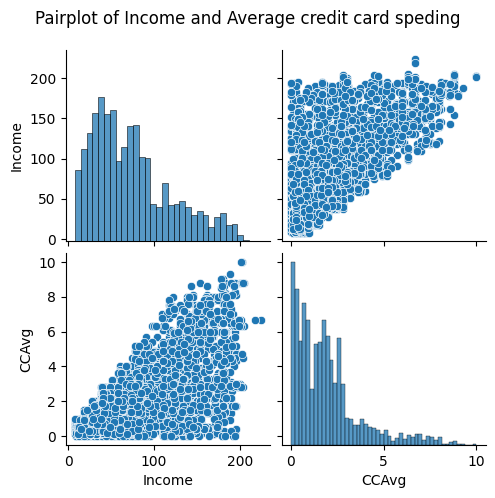

In [71]:
sns.pairplot(df[['Income', 'CCAvg']])
plt.suptitle('Pairplot of Income and Average credit card speding')
plt.subplots_adjust(top=0.9)
plt.show()

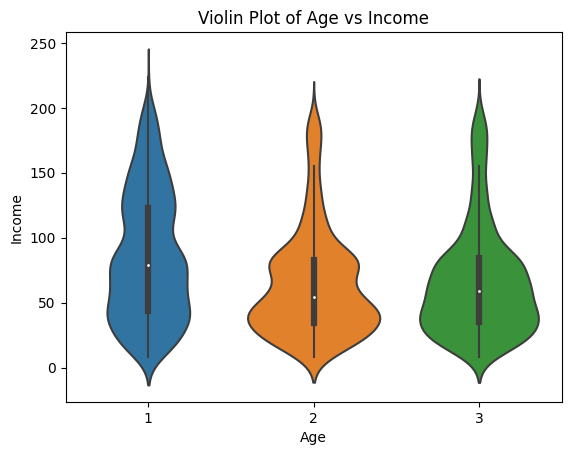

In [72]:
sns.violinplot(x='Education', y='Income', data=df)
plt.title('Violin Plot of Age vs Income')
plt.xlabel('Age')
# Author Pragadesh BS
plt.ylabel('Income')
plt.show()

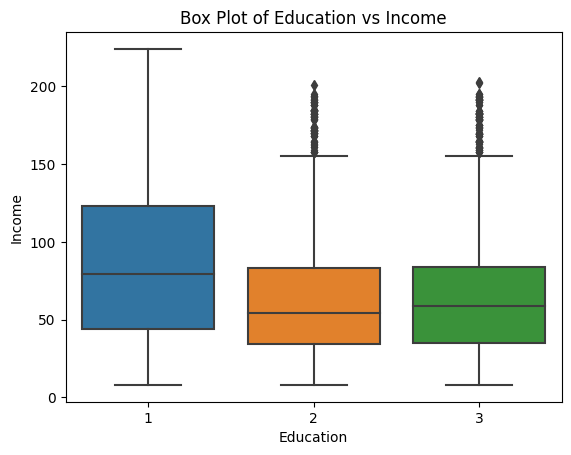

In [73]:
# Box plot of 'number of bedrooms' vs 'Price'
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Box Plot of Education vs Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

# Multivariate Analysis

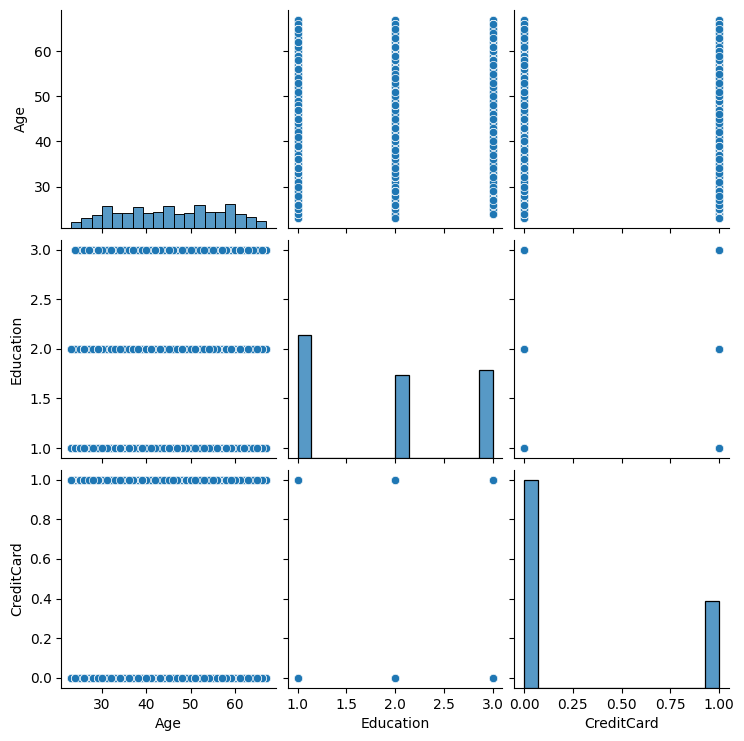

In [74]:
# Create a pairplot
sns.pairplot(df[['Age', 'Education', 'CreditCard']])
plt.show()

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

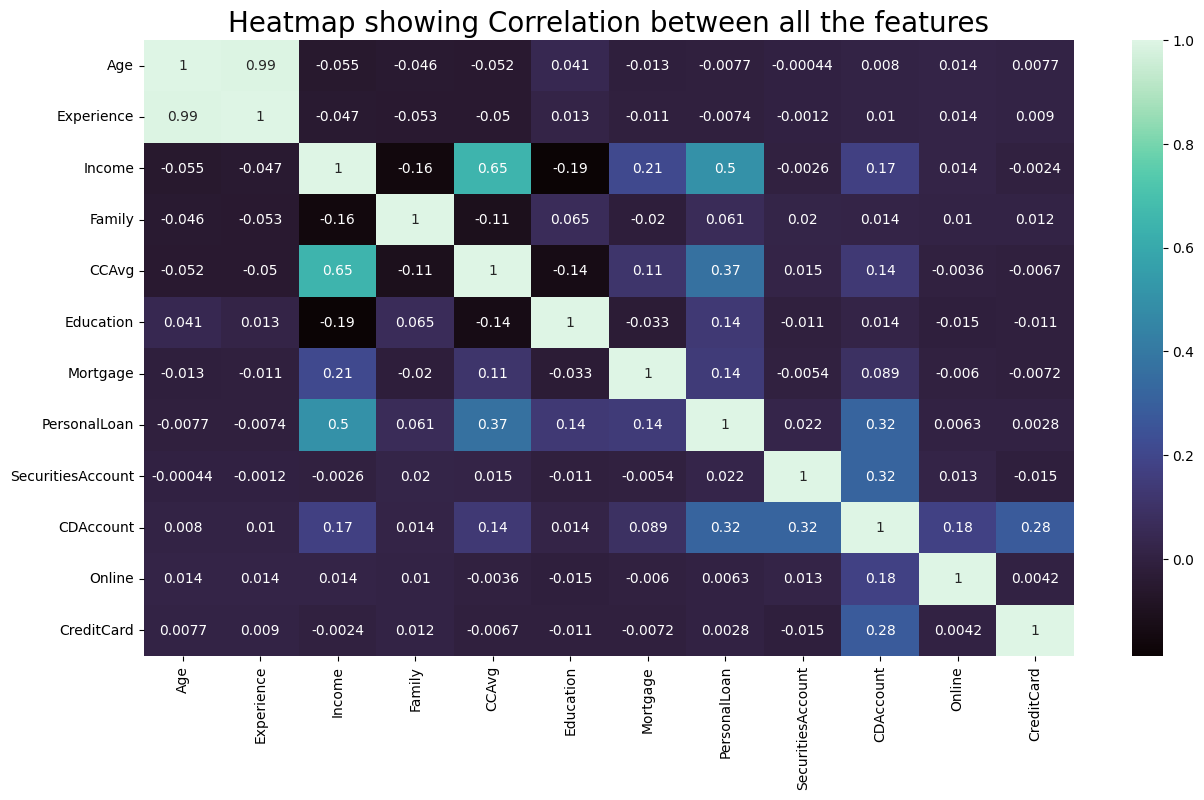

In [75]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')

# Data Split

In [76]:
zero_class = df1[df1.CreditCard==0]
zero_class.shape

(3530, 12)

In [77]:
one_class = df1[df1.CreditCard==1]
one_class.shape

(1470, 12)

### Scaling the data

In [78]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


# Train and test split

In [79]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = df1['CreditCard']

# Implementation of SVM

In [80]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [81]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.745


<Axes: >

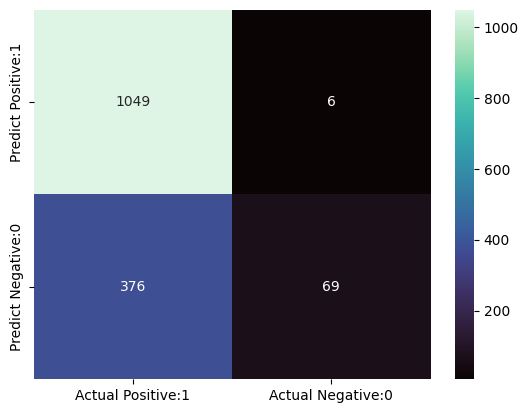

In [82]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [83]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1055
           1       0.92      0.16      0.27       445

    accuracy                           0.75      1500
   macro avg       0.83      0.57      0.56      1500
weighted avg       0.79      0.75      0.67      1500



# SVM Kernel Functions

# Linear Kernel

In [84]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.743


<Axes: >

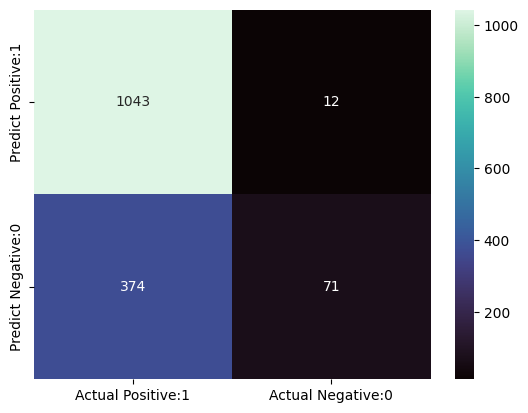

In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [86]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1055
           1       0.86      0.16      0.27       445

    accuracy                           0.74      1500
   macro avg       0.80      0.57      0.56      1500
weighted avg       0.77      0.74      0.67      1500



# Gaussian RBF kernel

In [87]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.745


<Axes: >

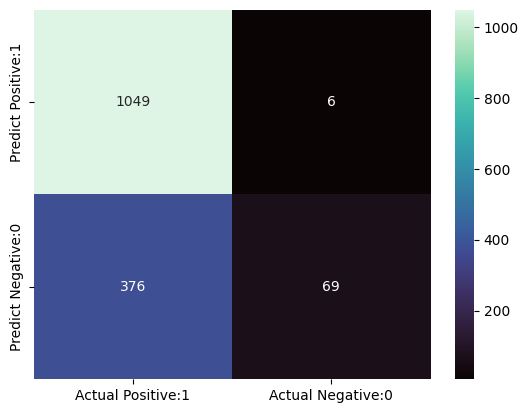

In [88]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [89]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1055
           1       0.92      0.16      0.27       445

    accuracy                           0.75      1500
   macro avg       0.83      0.57      0.56      1500
weighted avg       0.79      0.75      0.67      1500



# Polynomial Kernel

In [90]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.745


<Axes: >

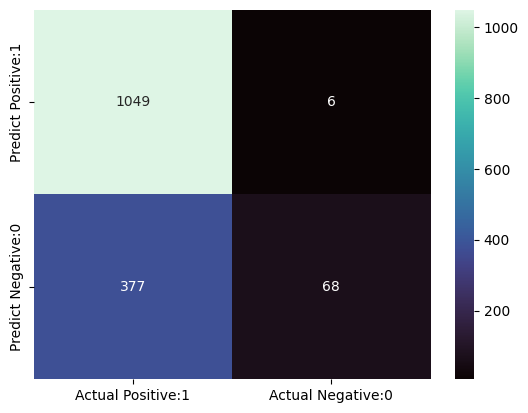

In [91]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [92]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1055
           1       0.92      0.15      0.26       445

    accuracy                           0.74      1500
   macro avg       0.83      0.57      0.55      1500
weighted avg       0.79      0.74      0.67      1500



# Sigmoid Kernel

In [93]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.628


<Axes: >

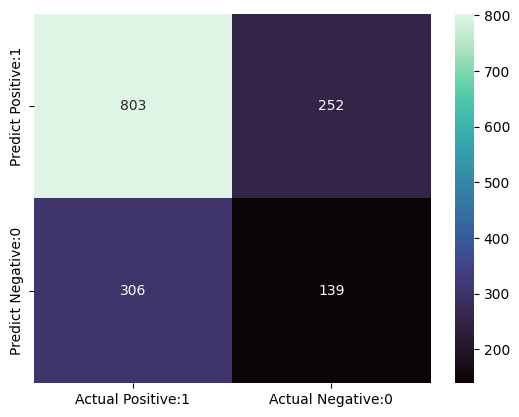

In [94]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [95]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1055
           1       0.36      0.31      0.33       445

    accuracy                           0.63      1500
   macro avg       0.54      0.54      0.54      1500
weighted avg       0.61      0.63      0.62      1500



# Result Analysis

Among all these above kernels Gaussian RBF kernel is giving more accurate Prediction. 

The model accuracy with Gaussian **RBF kernel is 0.74**

## Thank You !